In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set options to show all columns
pd.set_option('display.max_columns', None)

# Upload csv file
data = r'C:\repos\immo-eliza-team6-analysis\data\clean\after_step_4_correlation.csv' # Fill your path to file
df = pd.read_csv(data, sep = ',')





In [50]:
# transform dtypes 'object' to 'category'
int_columns = df.select_dtypes(include=['object'])

for col in int_columns.columns:
    df[col] = df[col].astype('category')

df['Postal_code']= df['Postal_code'].astype('string')
df['post_1'] = df['Postal_code'].str[0]
df['post_2'] = df['Postal_code'].str[0:2]

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5021 entries, 0 to 5020
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   id                         5021 non-null   int64   
 1   locality_name              5021 non-null   category
 2   Postal_code                5021 non-null   string  
 3   Price                      5021 non-null   int64   
 4   Subtype                    5021 non-null   category
 5   Number_of_bedrooms         5021 non-null   int64   
 6   Living_area                5021 non-null   int64   
 7   street                     5021 non-null   category
 8   number                     5005 non-null   category
 9   latitude                   5021 non-null   float64 
 10  longitude                  5021 non-null   float64 
 11  Open_fire                  5021 non-null   bool    
 12  Swimming_Pool              5021 non-null   bool    
 13  hasTerrace                 5021 n

In [51]:
df.describe(include='all')

c:\repos\immo-eliza-team6-analysis\.venv\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,id,locality_name,Postal_code,Price,Subtype,Number_of_bedrooms,Living_area,street,number,latitude,longitude,Open_fire,Swimming_Pool,hasTerrace,terraceSurface,gardenSurface,Kitchen_type,Number_of_facades,State_of_building,Furnished,epc,landSurface,price_per_sqm,price_per_sqm_land,Province,Assigned_City,Has_Assigned_City,Kitchen_type_encoded,State_of_building_encoded,EPC_encoded,post_1,post_2
count,5.021000e+03,5021,5021,5021.000000,5021,5021.000000,5021.000000,5021,5005,5021.000000,5021.000000,5021,5021,5021,5021.000000,5021.000000,5021,5021.000000,5021,5021,5021,4262.000000,5021.000000,4262.000000,5021,1418,5021,5021.000000,5021.000000,5021.000000,5021,5021
unique,NaN,1060,713,NaN,1,NaN,NaN,3703,592,NaN,NaN,2,2,2,NaN,NaN,4,NaN,5,2,6,NaN,NaN,NaN,11,10,1,NaN,NaN,NaN,9,79
top,NaN,Gent,9000,NaN,House,NaN,NaN,Stationsstraat,3,NaN,NaN,False,False,True,NaN,NaN,Installed,NaN,Good,False,F,NaN,NaN,NaN,East Flanders,Ghent,True,NaN,NaN,NaN,9,90
freq,NaN,170,135,NaN,5021,NaN,NaN,33,115,NaN,NaN,4779,4957,3392,NaN,NaN,3625,NaN,2465,4969,1412,NaN,NaN,NaN,1549,323,5021,NaN,NaN,NaN,1549,330
mean,1.906804e+07,NaN,NaN,357524.657439,NaN,3.297351,174.575184,NaN,NaN,50.879651,4.187886,NaN,NaN,NaN,9.341167,160.648277,NaN,2.237403,NaN,NaN,NaN,586.839512,2106.748201,inf,NaN,NaN,NaN,1.334196,1.928102,2.096196,NaN,NaN
std,2.943314e+06,NaN,NaN,134792.539292,NaN,0.919147,54.049451,NaN,NaN,0.327456,0.763858,NaN,NaN,NaN,29.632889,511.085223,NaN,1.383815,NaN,NaN,NaN,1236.294779,679.048271,NaN,NaN,NaN,NaN,0.740036,1.244193,1.695937,NaN,NaN
min,9.542242e+06,NaN,NaN,40000.000000,NaN,1.000000,27.000000,NaN,NaN,49.507785,2.585809,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,0.000000,352.352941,13.550136,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN
25%,2.011246e+07,NaN,NaN,259000.000000,NaN,3.000000,137.000000,NaN,NaN,50.778742,3.644580,NaN,NaN,NaN,0.000000,0.000000,NaN,2.000000,NaN,NaN,NaN,166.000000,1609.740260,518.756551,NaN,NaN,NaN,1.000000,1.000000,0.000000,NaN,NaN
50%,2.019136e+07,NaN,NaN,349000.000000,NaN,3.000000,167.000000,NaN,NaN,50.934366,4.137359,NaN,NaN,NaN,0.000000,0.000000,NaN,2.000000,NaN,NaN,NaN,326.000000,2061.452514,975.567116,NaN,NaN,NaN,1.000000,2.000000,2.000000,NaN,NaN
75%,2.022671e+07,NaN,NaN,439000.000000,NaN,4.000000,205.000000,NaN,NaN,51.085153,4.621914,NaN,NaN,NaN,14.000000,120.000000,NaN,3.000000,NaN,NaN,NaN,656.000000,2567.567568,1854.791823,NaN,NaN,NaN,1.000000,2.000000,3.000000,NaN,NaN


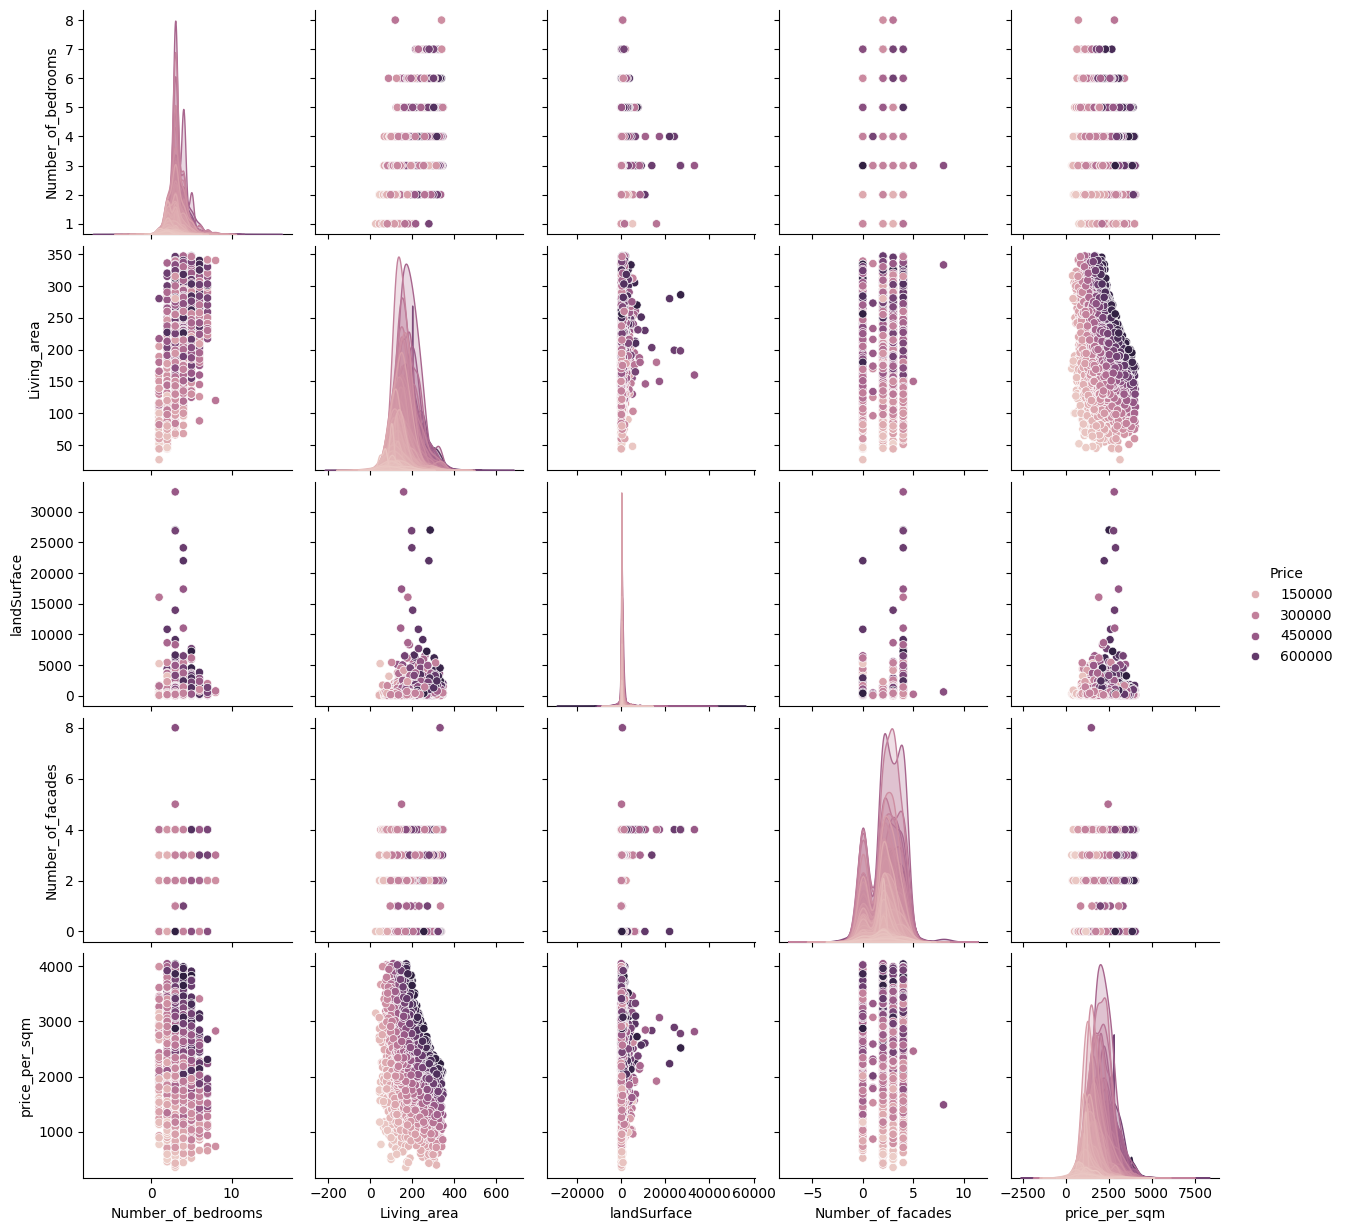

In [52]:
cols_to_plot = ['Number_of_bedrooms', 'Living_area', 'landSurface', 'Number_of_facades', 'price_per_sqm', 'Price']
sns.pairplot(df[cols_to_plot], hue='Price')
plt.show()



In [53]:
# Ensure 'Postal_code' is converted to integer for comparison
df['Postal_code'] = df['Postal_code'].astype(int)

# Apply the first condition: Flanders or Wallonie
df['region'] = df['Postal_code'].apply(
    lambda x: 'Flanders' if (1500 <= x < 4000) or (8000 <= x <= 9999) else 'Wallonie'
)

# Update 'region' to 'Brussels' for specific postal codes (compare integers)
df['region'] = df.apply(
    lambda row: 'Brussels' if 1000 <= row['Postal_code'] < 1300 else row['region'], axis=1
)
# Display the first few rows
df.head()

,id,locality_name,Postal_code,Price,Subtype,Number_of_bedrooms,Living_area,street,number,latitude,longitude,Open_fire,Swimming_Pool,hasTerrace,terraceSurface,gardenSurface,Kitchen_type,Number_of_facades,State_of_building,Furnished,epc,landSurface,price_per_sqm,price_per_sqm_land,Province,Assigned_City,Has_Assigned_City,Kitchen_type_encoded,State_of_building_encoded,EPC_encoded,post_1,post_2,region
0,20252354,Ronse,9600,319000,House,3,125,Rotterij,148,50.744176,3.625722,False,False,True,0,370,Installed,4,To renovate,False,F,767.0,2552.000000,415.906128,East Flanders,NaN,True,1,0,0,9,96,Flanders
1,20251003,Geraardsbergen,9500,299999,House,3,167,Pirrestraat,17,50.752121,3.925495,False,False,True,0,895,Installed,2,Good,False,D,1050.0,1796.401198,285.713333,East Flanders,NaN,True,1,2,2,9,95,Flanders
2,20252002,Mechelen,2800,275000,House,3,154,Caputsteenstraat,150,51.033269,4.491795,False,False,True,10,20,Semi equipped,2,To renovate,False,E,120.0,1785.714286,2291.666667,Antwerp,NaN,True,2,0,1,2,28,Flanders
3,20252352,Gooik,1755,295000,House,3,172,Strijlandstraat,45,50.791877,4.084293,False,False,True,0,300,Installed,3,To renovate,False,F,309.0,1715.116279,954.692557,Brabant_Wallon,NaN,True,1,0,0,1,17,Flanders
4,20251715,Dilbeek,1700,715000,House,3,280,Herdebeekstraat 94-94A,0,50.840610,4.228425,False,True,True,36,374,Installed,3,As new,False,C,374.0,2553.571429,1911.764706,Brabant_Wallon,NaN,True,1,4,3,1,17,Flanders


[(0.0, 900000.0)]

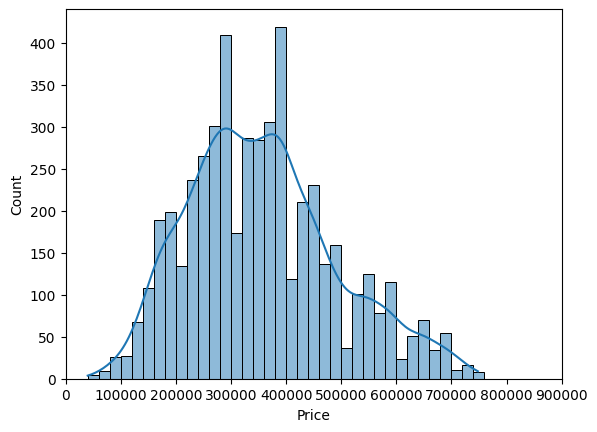

In [54]:
plotx= sns.histplot(df, x= 'Price', kde=True, binwidth=20000, binrange=(0, 900000)
                    )
plotx.set(xlim=(0, 900000))

In [55]:
print(df.columns)


Index(['id', 'locality_name', 'Postal_code', 'Price', 'Subtype',
       'Number_of_bedrooms', 'Living_area', 'street', 'number', 'latitude',
       'longitude', 'Open_fire', 'Swimming_Pool', 'hasTerrace',
       'terraceSurface', 'gardenSurface', 'Kitchen_type', 'Number_of_facades',
       'State_of_building', 'Furnished', 'epc', 'landSurface', 'price_per_sqm',
       'price_per_sqm_land', 'Province', 'Assigned_City', 'Has_Assigned_City',
       'Kitchen_type_encoded', 'State_of_building_encoded', 'EPC_encoded',
       'post_1', 'post_2', 'region'],
      dtype='object')


<Axes: xlabel='region', ylabel='Count'>

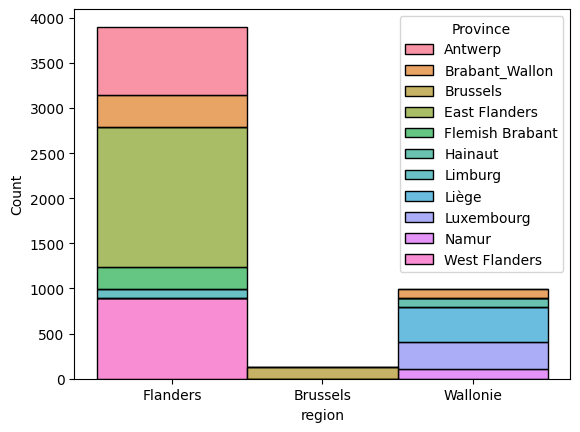

In [69]:
df_sorted = df.sort_values(by='post_1')
sns.histplot(df_sorted, x= 'region', hue = "Province", multiple="stack")



Text(0.5, 1.0, 'Price Distribution by Province (Percentage within Province)')

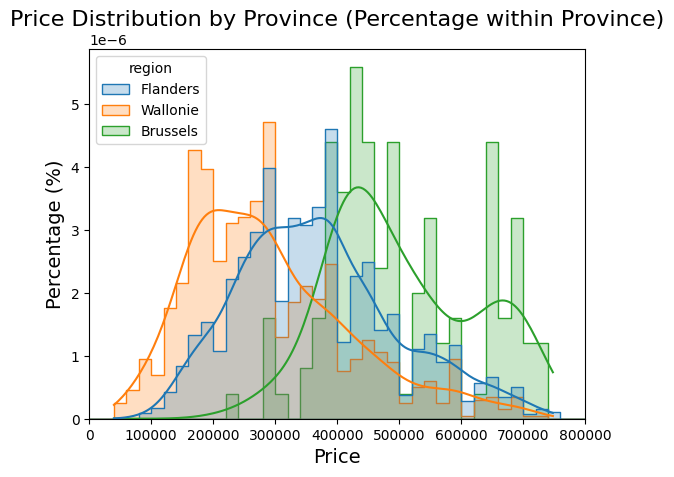

In [89]:
plotx= sns.histplot(df, x= 'Price', kde=True, hue = "region", binwidth=20000, binrange=(0, 1000000), stat='density', element = "step", common_norm=False)

plotx.set(xlim=(0, 800000))

# Set labels and title
plotx.set_xlabel('Price', fontsize=14)
plotx.set_ylabel('Percentage (%)', fontsize=14)
plotx.set_title('Price Distribution by Province (Percentage within Province)', fontsize=16)

Text(0.5, 1.0, 'Price Distribution by State of building (normalized)')

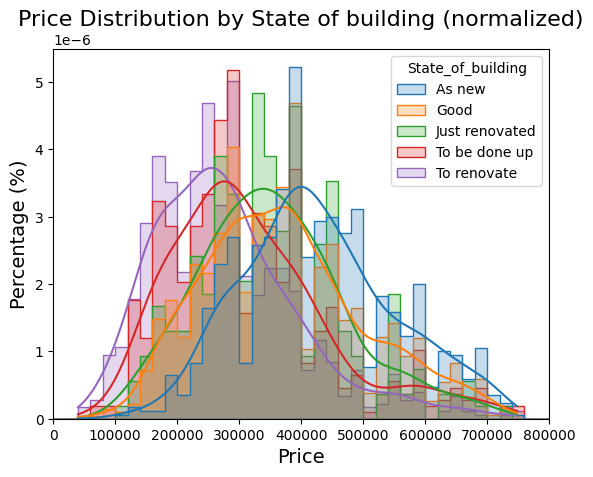

In [93]:
plotx= sns.histplot(df, x= 'Price', kde=True, hue = "State_of_building", binwidth=20000, binrange=(0, 1000000), stat='density', element = "step", common_norm=False)

plotx.set(xlim=(0, 800000))

# Set labels and title
plotx.set_xlabel('Price', fontsize=14)
plotx.set_ylabel('Percentage (%)', fontsize=14)
plotx.set_title('Price Distribution by State of building (normalized)', fontsize=16)

Text(0.5, 1.0, 'Price Distribution by region (normalized)')

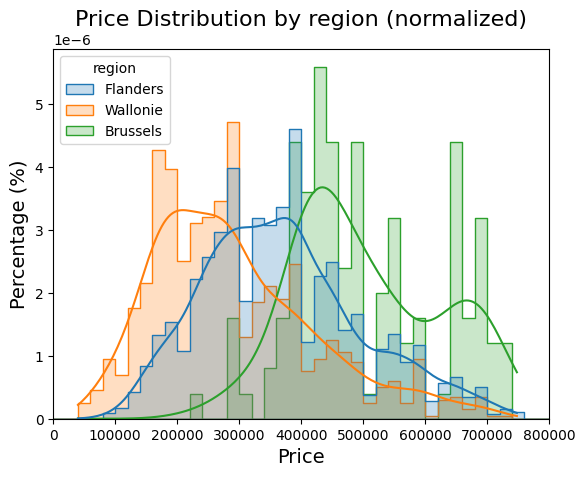

In [96]:
plotx= sns.histplot(df, x= 'Price', kde=True, hue = "region", binwidth=20000, binrange=(0, 1000000), stat='density', element = "step", common_norm=False)

plotx.set(xlim=(0, 800000))

# Set labels and title
plotx.set_xlabel('Price', fontsize=14)
plotx.set_ylabel('Percentage (%)', fontsize=14)
plotx.set_title('Price Distribution by region (normalized)', fontsize=16)

[(0.0, 800000.0)]

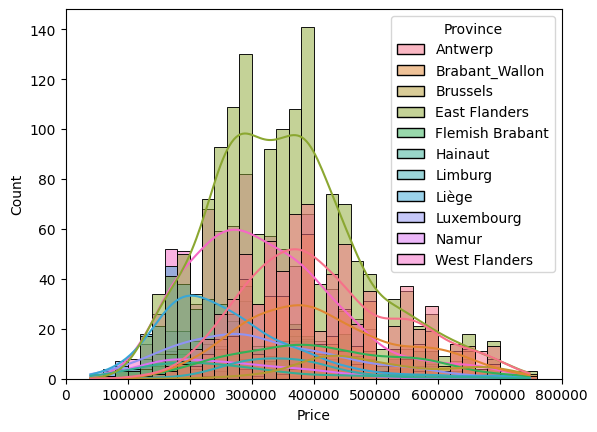

In [78]:
plotx= sns.histplot(df, x= 'Price', kde=True, hue = "Province", binwidth=20000, binrange=(0, 1000000), alpha=0.5)
plotx.set(xlim=(0, 800000))

[(0.0, 800000.0)]

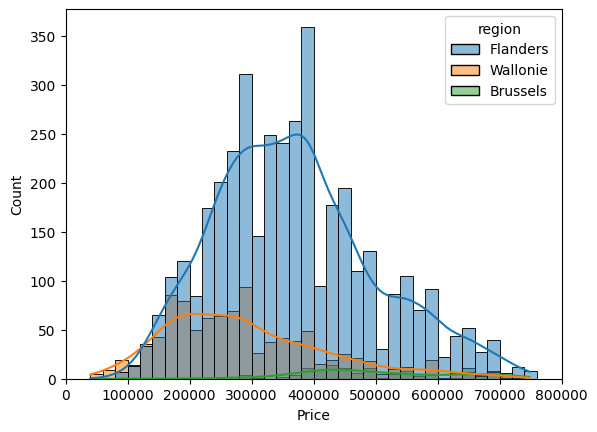

In [71]:
plotx= sns.histplot(df, x= 'Price', kde=True, hue = "region", binwidth=20000, binrange=(0, 1000000))
plotx.set(xlim=(0, 800000))

In [59]:

# Group by region and postal code, then calculate the average price
avg_price_per_postal_code = df.groupby(['region', 'Postal_code'])['Price'].mean().reset_index()

# Find the postal code with the highest average price per region
max_avg_price_per_region = avg_price_per_postal_code.loc[
    avg_price_per_postal_code.groupby('region')['Price'].idxmax()
]

# Display the result
print(max_avg_price_per_region)



       region  Postal_code     Price
5    Brussels         1060  672000.0
173  Flanders         3054  720000.0
519  Wallonie         4577  695000.0


In [60]:
# Step 1: Filter postal codes with at least 5 records
postal_code_counts = avg_price_per_postal_code['Postal_code'].value_counts()
valid_postal_codes = postal_code_counts[postal_code_counts >= 5].index

filtered_data = avg_price_per_postal_code[avg_price_per_postal_code['Postal_code'].isin(valid_postal_codes)]

# Step 2: Get max avg price per region
max_avg_price_per_region = filtered_data.loc[
    filtered_data.groupby('region')['Price'].idxmax()
]

print(max_avg_price_per_region)

Empty DataFrame
Columns: [region, Postal_code, Price]
Index: []


In [61]:
# Group by region and postal code, then calculate the median price
median_price_per_postal_code = df.groupby(['region', 'Postal_code'])['Price'].median().reset_index()

# Find the postal code with the highest median price per region
max_median_price_per_region = median_price_per_postal_code.loc[
    median_price_per_postal_code.groupby('region')['Price'].idxmax()
]

# Display the result
print(max_median_price_per_region)

       region  Postal_code     Price
14   Brussels         1150  685000.0
173  Flanders         3054  720000.0
519  Wallonie         4577  695000.0


In [62]:
df_filtered = df[df['Postal_code'] == '1000']
df_filtered.head()

,id,locality_name,Postal_code,Price,Subtype,Number_of_bedrooms,Living_area,street,number,latitude,longitude,Open_fire,Swimming_Pool,hasTerrace,terraceSurface,gardenSurface,Kitchen_type,Number_of_facades,State_of_building,Furnished,epc,landSurface,price_per_sqm,price_per_sqm_land,Province,Assigned_City,Has_Assigned_City,Kitchen_type_encoded,State_of_building_encoded,EPC_encoded,post_1,post_2,region


In [63]:
# Group by region and postal code, then calculate the average price per sqm
avg_price_per_sqm_per_postal_code = df.groupby(['region', 'Postal_code'])['price_per_sqm'].mean().reset_index()

# Find the postal code with the highest average price per region
max_avg_price_per_sqm_per_region = avg_price_per_sqm_per_postal_code.loc[
    avg_price_per_sqm_per_postal_code.groupby('region')['price_per_sqm'].idxmax()
]

# Display the result
print(max_avg_price_per_sqm_per_region)

       region  Postal_code  price_per_sqm
15   Brussels         1160    3410.197229
180  Flanders         3111    3613.861386
457  Wallonie         1460    3384.615385


In [64]:
# Group by region and calculate the average house price
avg_price_per_region = df.groupby('region')['Price'].mean().reset_index()

# Optional: Format the price values for readability
avg_price_per_region['Price'] = avg_price_per_region['Price'].map('{:,.2f}'.format)

# Display the result
print(avg_price_per_region)

## 


     region       Price
0  Brussels  504,688.00
1  Flanders  369,607.87
2  Wallonie  291,663.33


https://postcode.nationaal.be/

https://www.notaris.be/vastgoedprijzen

tgoedprijzen

In [65]:
# Group by region and calculate the average house price
avg_price_per_sqm_per_region = df.groupby('region')['price_per_sqm'].mean().reset_index()

# Optional: Format the price values for readability
avg_price_per_sqm_per_region['price_per_sqm'] = avg_price_per_sqm_per_region['price_per_sqm'].map('{:,.2f}'.format)

# Display the result
print(avg_price_per_sqm_per_region)

     region price_per_sqm
0  Brussels      2,719.07
1  Flanders      2,152.10
2  Wallonie      1,852.04
